In [1]:
import os
import bz2
import time
import json
from tqdm import tqdm
import pandas as pd

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# Define the path to the directory: in this case, Journal de Geneve
NEWSPAPER_FOLDER = 'collections'

data = []

# To get the total number of bz2 files beforehand (for accurate progress bar)
total_files = sum(1 for _, _, filenames in os.walk(NEWSPAPER_FOLDER) for f in filenames if f.endswith('.csv'))

i = 0
# Walk through the directory
file_time_start = time.time()
for dirpath, dirnames, filenames in os.walk(NEWSPAPER_FOLDER):
    for filename in tqdm(filenames, total=total_files, desc="Reading files"):
        # Check if the file has a .bz2 extension
        if filename.endswith('.csv'):
            filepath = os.path.join(dirpath, filename)    
            fichier = pd.read_csv(filepath, sep= ";")
            fichier['filename'] = filename
            data.append(fichier)

    print(f'Number of files in {dirpath}: {len(filenames)}. Time taken to read files: {time.time() - file_time_start}')

data = pd.concat(data)

Reading files: 17it [00:00, 95.77it/s]                                          

Number of files in collections: 17. Time taken to read files: 0.2063889503479004


In [79]:
import chardet

with open('WGMS-FoG-2017-10-C-FRONT-VARIATION.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

wgms_dataframe = pd.read_csv('WGMS-FoG-2017-10-C-FRONT-VARIATION.csv', encoding=encoding)

In [80]:
wgms_dataframe.head()

,POLITICAL_UNIT,NAME,WGMS_ID,Year,FRONT_VARIATION,FRONT_VAR_UNC,QUALITATIVE_VARIATION,SURVEY_DATE,SURVEY_PATFORM_METHOD,REFERENCE_DATE,PUB_IN_FOG,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,99,BERG,1102,1967,-8.4,NaN,NaN,19679999.0,NaN,19669999.0,1975.0,NaN,NaN,NaN,NaN
1,99,BERG,1102,1970,-19.0,NaN,NaN,19709999.0,NaN,19699999.0,1975.0,NaN,NaN,NaN,NaN
2,99,KARTAYGAN,1094,1966,-4.0,NaN,NaN,19669999.0,NaN,19659999.0,1975.0,NaN,NaN,NaN,NaN
3,99,KLYCH,1108,1968,-10.0,NaN,NaN,19689999.0,NaN,19649999.0,NaN,NaN,NaN,"DISCHL, M. (1999), Diplomarbeit. Geographische...",NaN
4,99,KLYCH,1108,1973,-9.0,NaN,NaN,19739999.0,NaN,19709999.0,1975.0,NaN,NaN,NaN,NaN


In [81]:
print(wgms_dataframe['NAME'].unique().tolist())

['BERG', 'KARTAYGAN', 'KLYCH', 'LAZG-TSITI', 'SATPAYEV', 'TARAMUZ-I', 'TEBULO', ' NO 13', ' NO 161', 'ADAMS', 'BAHIA DEL DIABLO', 'BARTLEY', 'BIRLEY', 'CANADA', 'CLARK CPI', 'COLEY GLACIER', 'COMMONWEALTH', 'E SKEP PT. G', 'FINGER', 'GOODSPEED', 'GOURDON', 'HART', 'HEIMDALL', 'HOBBS', 'HURLEY', 'KALESNIKA', 'LA CROIX', 'MESERVE MPII', 'MIERS', 'MOIDER', 'N MOUNT REES G', 'NE ADELAIDE I G', 'NO 1', 'NO 10', 'NO 100', 'NO 101', 'NO 102', 'NO 103', 'NO 104', 'NO 105', 'NO 106', 'NO 107', 'NO 108', 'NO 109', 'NO 11', 'NO 110', 'NO 111', 'NO 112 (PETZVAL)', 'NO 113', 'NO 114 (DAQUERRE)', 'NO 115', 'NO 116', 'NO 117', 'NO 118', 'NO 119', 'NO 12', 'NO 120', 'NO 121', 'NO 122', 'NO 123', 'NO 124', 'NO 125', 'NO 126', 'NO 127', 'NO 128', 'NO 129', 'NO 130', 'NO 131', 'NO 132', 'NO 133', 'NO 134', 'NO 135', 'NO 136', 'NO 137', 'NO 138', 'NO 139', 'NO 14', 'NO 140', 'NO 141', 'NO 142', 'NO 143', 'NO 144', 'NO 145', 'NO 146', 'NO 147', 'NO 148', 'NO 149', 'NO 15', 'NO 150', 'NO 151', 'NO 152', 'NO

In [82]:
import pandas as pd

wgms_df = pd.DataFrame(wgms_dataframe)

# Calculer la dérivée seconde (accélération) de FRONT_VARIATION
wgms_df['Acceleration'] = wgms_df['FRONT_VARIATION'].diff().diff()

wgms_df

,POLITICAL_UNIT,NAME,WGMS_ID,Year,FRONT_VARIATION,FRONT_VAR_UNC,QUALITATIVE_VARIATION,SURVEY_DATE,SURVEY_PATFORM_METHOD,REFERENCE_DATE,PUB_IN_FOG,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS,Acceleration
0,99,BERG,1102,1967,-8.4,NaN,NaN,19679999.0,NaN,19669999.0,1975.0,NaN,NaN,NaN,NaN,NaN
1,99,BERG,1102,1970,-19.0,NaN,NaN,19709999.0,NaN,19699999.0,1975.0,NaN,NaN,NaN,NaN,NaN
2,99,KARTAYGAN,1094,1966,-4.0,NaN,NaN,19669999.0,NaN,19659999.0,1975.0,NaN,NaN,NaN,NaN,25.6
3,99,KLYCH,1108,1968,-10.0,NaN,NaN,19689999.0,NaN,19649999.0,NaN,NaN,NaN,"DISCHL, M. (1999), Diplomarbeit. Geographische...",NaN,-21.0
4,99,KLYCH,1108,1973,-9.0,NaN,NaN,19739999.0,NaN,19709999.0,1975.0,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44687,UZ,TURPAKBEL NIZHN,752,1986,0.0,0.5,NaN,19869999.0,tG,19859999.0,1990.0,NaN,NaN,NaN,NaN,5.4
44688,UZ,TURPAKBEL NIZHN,752,1987,0.0,NaN,NaN,19879999.0,NaN,19869999.0,1990.0,NaN,NaN,NaN,NaN,-7.7
44689,UZ,TURPAKBEL NIZHN,752,1988,-7.9,NaN,NaN,19889999.0,NaN,19879999.0,1990.0,NaN,NaN,NaN,NaN,-7.9
44690,UZ,TURPAKBEL NIZHN,752,1989,-7.8,NaN,NaN,19899999.0,NaN,19889999.0,1990.0,NaN,NaN,NaN,NaN,8.0


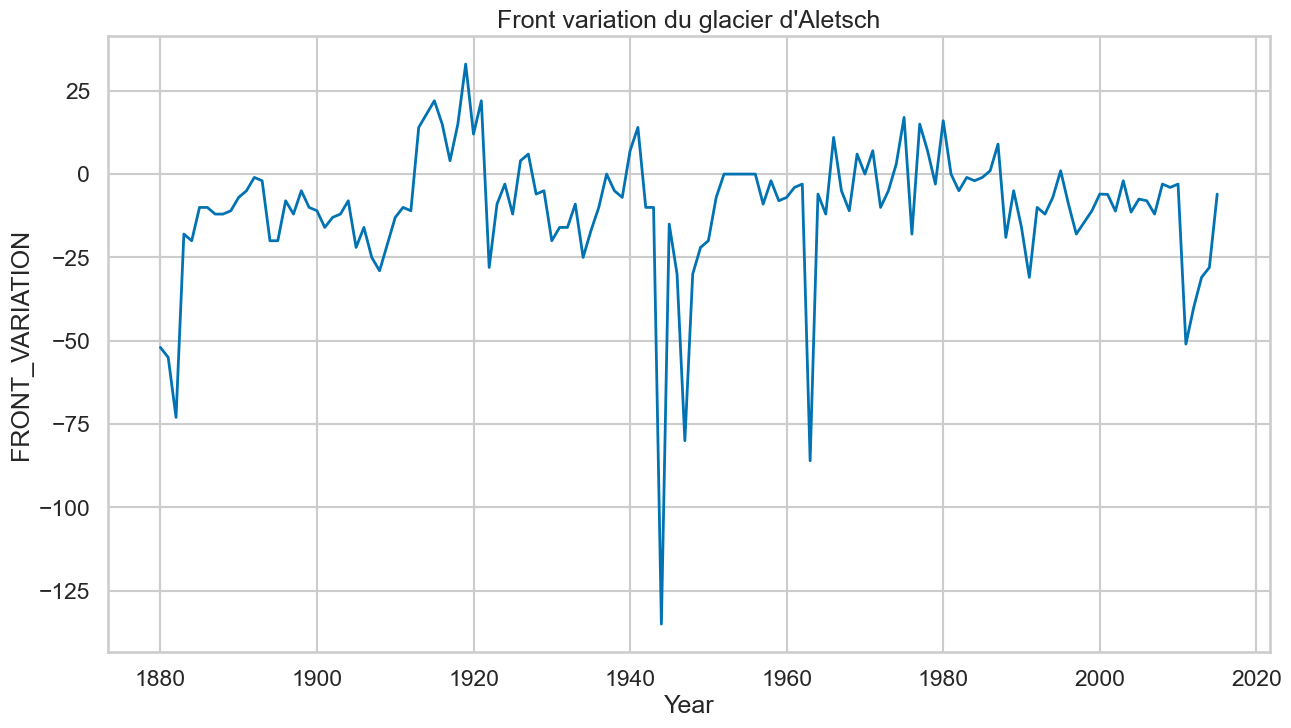

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", font_scale=1.0)
sns.set_palette("colorblind")

wgms_df = pd.DataFrame(wgms_dataframe)

# Ne garder que les lignes avec "GROSSER ALETSCH"
filtered_df = wgms_df[wgms_df['NAME'] == 'RHONE']

#liste des glaciers 
#'Rhone', 'Grindelwald', 'Arpette', 'Pers', 'Zmutt', 'Orny','Allalin', 'Aletsch', 'Otemma', 'Morteratsch', 'Kanderfirn',
#'Trient', 'Rosa', 'Zinal', 'Roseg', 'Arolla'

#liste des glaciers dont les front variations ont été mesurées
#'RHONE' 'OBERER GRINDELWALD' 'UNTERER GRINDELWALD' 'ZMUTT' 'ALLALIN' 'GROSSER ALETSCH' 'OTEMMA' 'MORTERATSCH'
#'TRIENT' 'ZINAL' 'ROSEG' 'AROLLA (BAS)'


#delete les pics trop important ? (roseg)


plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='FRONT_VARIATION', data=filtered_df, linewidth=2)
plt.title("Front variation du glacier d'Aletsch")
plt.show()

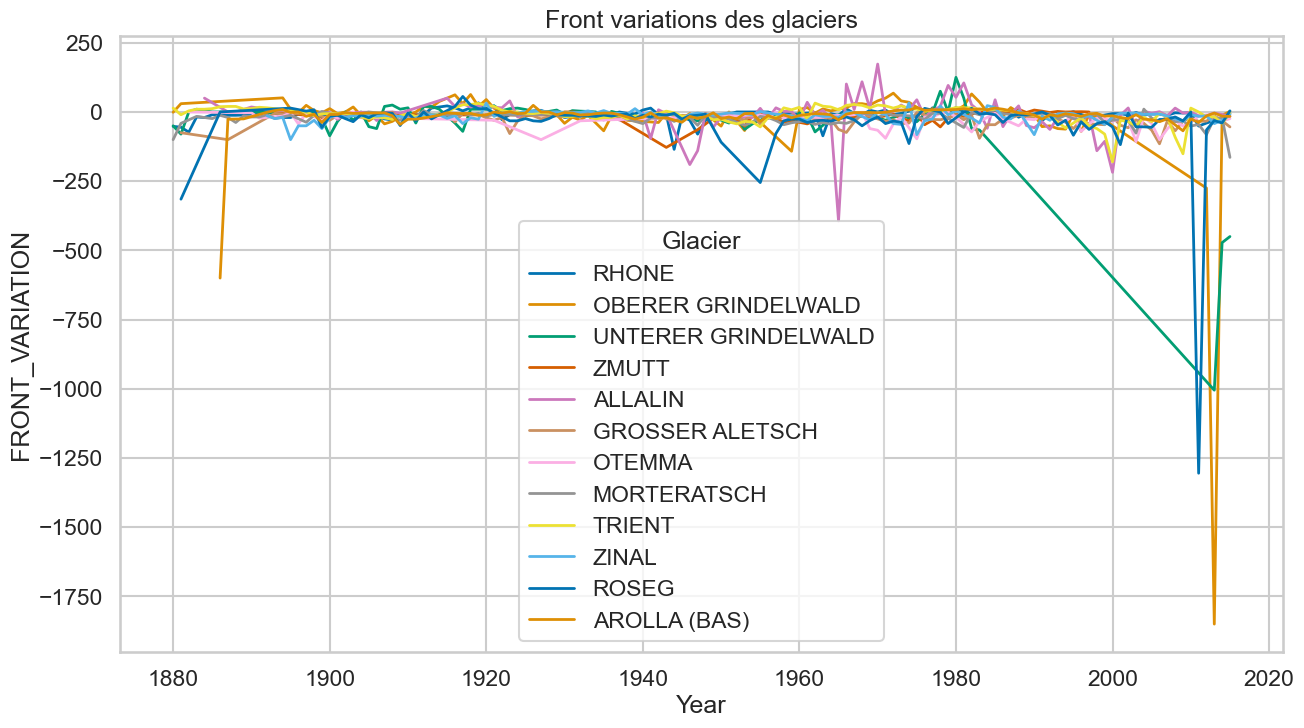

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", font_scale=1.0)
sns.set_palette("colorblind")

wgms_df = pd.DataFrame(wgms_dataframe)

glaciers = ['RHONE', 'OBERER GRINDELWALD', 'UNTERER GRINDELWALD', 'ZMUTT', 'ALLALIN', 'GROSSER ALETSCH', 'OTEMMA', 'MORTERATSCH', 'TRIENT', 'ZINAL', 'ROSEG', 'AROLLA (BAS)']

plt.figure(figsize=(15, 8))

for glacier_name in glaciers:
    filtered_df = wgms_df[wgms_df['NAME'] == glacier_name]
    sns.lineplot(x='Year', y='FRONT_VARIATION', data=filtered_df, linewidth=2, label=glacier_name)

plt.title("Front variations des glaciers")
plt.legend(title='Glacier')
plt.show()

/var/folders/_3/vwbs1mlx70s08x_qwnrmjwdr0000gn/T/ipykernel_28575/2723877213.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Moving_Avg'] = filtered_df['FRONT_VARIATION'].rolling(window=5).mean()


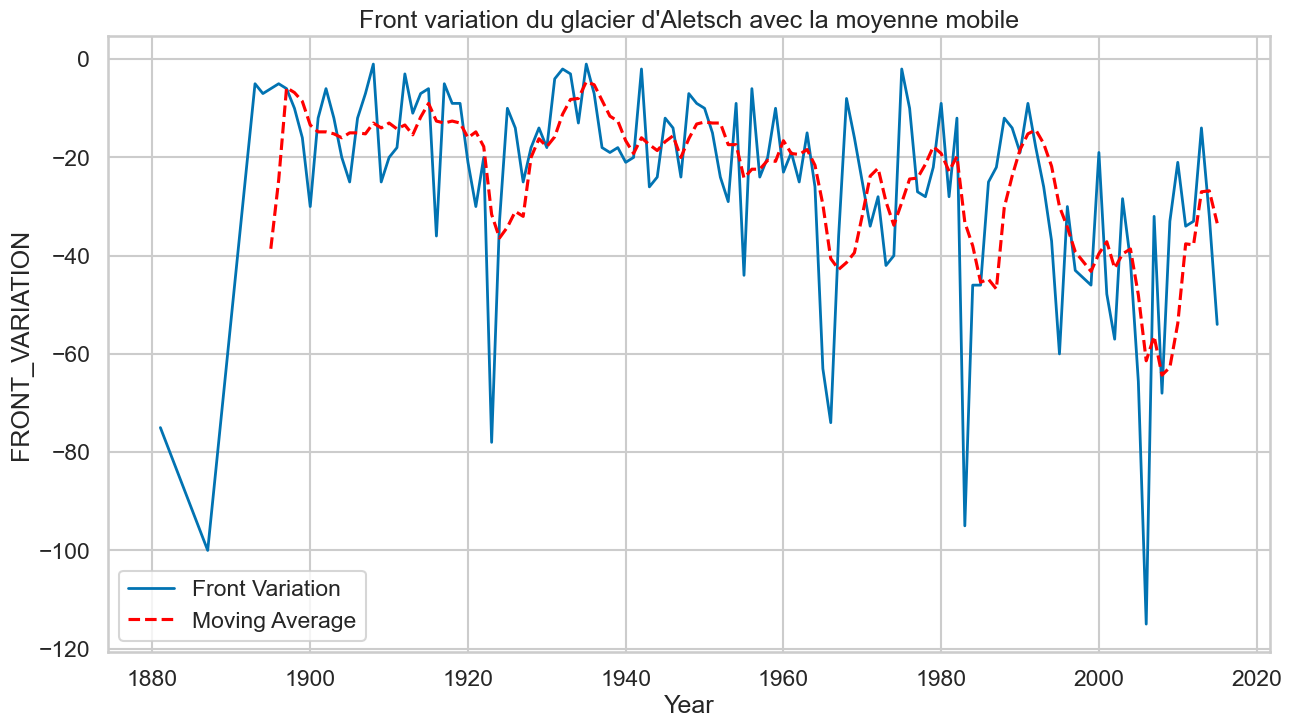

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", font_scale=1.0)
sns.set_palette("colorblind")

wgms_df = pd.DataFrame(wgms_dataframe)

# Ne garder que les lignes avec "GROSSER ALETSCH"
filtered_df = wgms_df[wgms_df['NAME'] == 'GROSSER ALETSCH']

# Calculer la moyenne mobile avec une fenêtre de 5 années
filtered_df['Moving_Avg'] = filtered_df['FRONT_VARIATION'].rolling(window=5).mean()

# Tracer le graphique
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='FRONT_VARIATION', data=filtered_df, linewidth=2, label='Front Variation')
sns.lineplot(x='Year', y='Moving_Avg', data=filtered_df, linestyle='--', color='red', label='Moving Average')

plt.title("Front variation du glacier d'Aletsch avec la moyenne mobile")
plt.legend()
plt.show()

In [53]:
import chardet

with open('WGMS-FoG-2017-10-F-SPECIAL-EVENT.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

wgms_dataframe2 = pd.read_csv('WGMS-FoG-2017-10-F-SPECIAL-EVENT.csv', encoding=encoding)

In [54]:
wgms_dataframe2.head()

,POLITICAL_UNIT,NAME,Event_ID,WGMS_ID,EVENT_DATE,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER,EVENT_DESCRIPTION,INVESTIGATOR,SPONSORING_AGENCY,REFERENCE,REMARKS,PUB_IN_FOG
0,AQ,NO 38,344,4037,19909999,1.0,0.0,0.0,0.0,0.0,0.0,The Oktyabr'sky glacier surged for an estimate...,NaN,NaN,Kotlakov (2008),1985-1990,NaN
1,AR,ALTO DEL PLOMO,133,922,19841114,1.0,0.0,1.0,0.0,0.0,0.0,"On 14 November 1984, Rio del Plomo was dammed ...",NaN,NaN,"Espizua, L. E., Bengochea, J. D. (1990): Surge...",NaN,NaN
2,AR,CERRO MARMOLEJO EAST GLACIER,594,8171,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
3,AR,COLINA (COLINO),593,8170,19379999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
4,AR,EAST OF CERRO POLLERAS,592,8169,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN


In [104]:
pd.set_option('display.max_columns', None)

In [121]:
import pandas as pd

wgms_df2 = pd.DataFrame(wgms_dataframe2)

# Conversion des valeurs de la colonne 'EVENT_DATE' en chaînes de caractères
wgms_df2['EVENT_DATE'] = wgms_df2['EVENT_DATE'].astype(str)

# Création de la colonne "Date"
wgms_df2['DATE'] = wgms_df2['EVENT_DATE'].apply(lambda x: x[:4] if x[:4] != '9999' else 'no date')

wgms_df2

,POLITICAL_UNIT,NAME,Event_ID,WGMS_ID,EVENT_DATE,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER,EVENT_DESCRIPTION,INVESTIGATOR,SPONSORING_AGENCY,REFERENCE,REMARKS,PUB_IN_FOG,DATE
0,AQ,NO 38,344,4037,19909999,1.0,0.0,0.0,0.0,0.0,0.0,The Oktyabr'sky glacier surged for an estimate...,NaN,NaN,Kotlakov (2008),1985-1990,NaN,1990
1,AR,ALTO DEL PLOMO,133,922,19841114,1.0,0.0,1.0,0.0,0.0,0.0,"On 14 November 1984, Rio del Plomo was dammed ...",NaN,NaN,"Espizua, L. E., Bengochea, J. D. (1990): Surge...",NaN,NaN,1984
2,AR,CERRO MARMOLEJO EAST GLACIER,594,8171,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date
3,AR,COLINA (COLINO),593,8170,19379999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,1937
4,AR,EAST OF CERRO POLLERAS,592,8169,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,US,YANERT,2826,7489,20019999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",surge onset: 2000,NaN,2001
3043,US,YENTNA,2781,7453,19729999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,1972
3044,US,YENTNA,2782,7453,20009999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,2000
3045,US,YUKON A,2943,7588,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date


In [117]:
print(wgms_df2.columns)


Index(['POLITICAL_UNIT', 'NAME', 'Event_ID', 'WGMS_ID', 'EVENT_DATE',
       'ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_AVALANCHE', 'ET_TECTONIC',
       'ET_OTHER', 'EVENT_DESCRIPTION', 'INVESTIGATOR', 'SPONSORING_AGENCY',
       'REFERENCE', 'REMARKS', 'PUB_IN_FOG', 'DATE'],
      dtype='object')


KeyError: 'DATE'

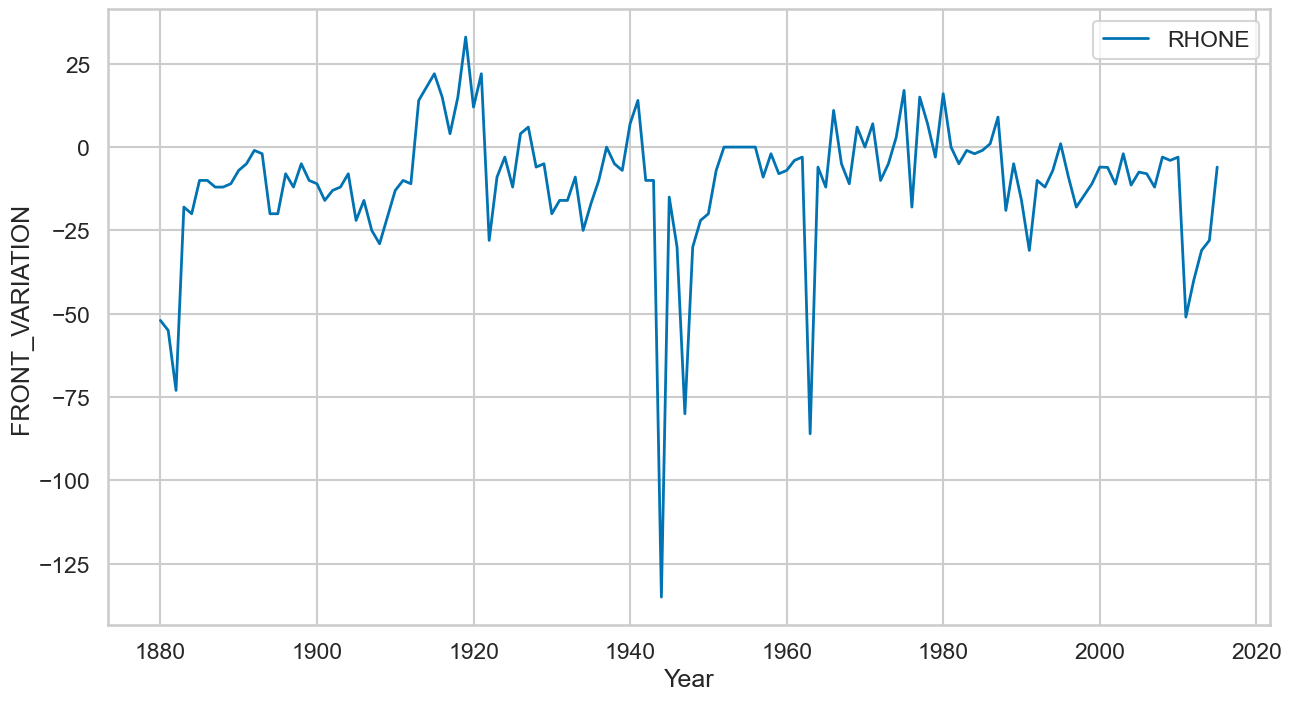

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", font_scale=1.0)
sns.set_palette("colorblind")

wgms_df = pd.DataFrame(wgms_dataframe)
wgms_df2 = pd.DataFrame(wgms_dataframe2)

glaciers = ['RHONE', 'OBERER GRINDELWALD', 'UNTERER GRINDELWALD', 'ZMUTT', 'ALLALIN', 'GROSSER ALETSCH', 'OTEMMA', 'MORTERATSCH', 'TRIENT', 'ZINAL', 'ROSEG', 'AROLLA (BAS)']

plt.figure(figsize=(15, 8))

for glacier_name in glaciers:
    filtered_df = wgms_df[wgms_df['NAME'] == glacier_name]
    
    x_column_name = 'Year' 
    
    sns.lineplot(x=x_column_name, y='FRONT_VARIATION', data=filtered_df, linewidth=2, label=glacier_name)

    # Points rouges pour les dates différentes de '9999' dans la deuxième DataFrame
    filtered_df2 = wgms_df2[(wgms_df2['NAME'] == glacier_name) & (wgms_df2['DATE'] != 'no date')]
    plt.scatter(filtered_df2['DATE'], filtered_df2['FRONT_VARIATION'], color='red', marker='o', label=f'{glacier_name} (Points rouges)')

plt.title("Front variation des glaciers")
plt.legend(title='Glacier')
plt.show()

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", font_scale=1.0)
sns.set_palette("colorblind")

wgms_df = pd.DataFrame(wgms_dataframe)
wgms_df2 = pd.DataFrame(wgms_dataframe2)

# Conversion des valeurs de la colonne 'EVENT_DATE' en chaînes de caractères
wgms_df2['EVENT_DATE'] = wgms_df2['EVENT_DATE'].astype(str)

glaciers = ['RHONE', 'OBERER GRINDELWALD', 'UNTERER GRINDELWALD', 'ZMUTT', 'ALLALIN', 'GROSSER ALETSCH', 'OTEMMA', 'MORTERATSCH', 'TRIENT', 'ZINAL', 'ROSEG', 'AROLLA (BAS)']

plt.figure(figsize=(15, 8))

for glacier_name in glaciers:
    filtered_df = wgms_df[wgms_df['NAME'] == glacier_name]
    sns.lineplot(x='Year', y='FRONT_VARIATION', data=filtered_df, linewidth=2, label=glacier_name)

    # Points rouges pour les dates existantes dans la deuxième DataFrame
    filtered_df2 = wgms_df2[(wgms_df2['NAME'] == glacier_name) & (wgms_df2['DATE'] != 'no date')]
    plt.scatter(filtered_df2['Year'], filtered_df2['FRONT_VARIATION'], color='red', marker='o', label=f'{glacier_name} (Points rouges)')

plt.title("Front variation des glaciers")
plt.legend(title='Glacier')
plt.show()

ValueError: Could not interpret value `YEAR` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x800 with 0 Axes>

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wgms_df = pd.DataFrame(wgms_dataframe)
wgms_df2 = pd.DataFrame(wgms_dataframe2)

# Fusion des deux DataFrames sur la colonne 'NAME'
merged_df = pd.merge(wgms_df, wgms_df2, on='NAME', how='left')

selected_glaciers = ['RHONE', 'OBERER GRINDELWALD', 'UNTERER GRINDELWALD', 'ZMUTT', 'ALLALIN', 'GROSSER ALETSCH', 'OTEMMA', 'MORTERATSCH', 'TRIENT', 'ZINAL', 'ROSEG', 'AROLLA (BAS)']

# Filtrage des glaciers dans la liste sélectionnée
filtered_df = merged_df[merged_df['NAME'].isin(selected_glaciers)]

# Filtrage des points où les dates existe dans la deuxième DataFrame
filtered_df = filtered_df[filtered_df['DATE'] != 'no date']

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='FRONT_VARIATION', data=wgms_df, linewidth=2, label='Original Data')
sns.scatterplot(x='Year', y='FRONT_VARIATION', data=filtered_df, color='red', label='Modified Data')
plt.title("Front variation avec points rouges pour les évenements")
plt.legend()
plt.show()

,POLITICAL_UNIT_x,NAME,Event_ID_x,WGMS_ID_x,EVENT_DATE_x,ET_SURGE_x,ET_CALVING_x,ET_FLOOD_x,ET_AVALANCHE_x,ET_TECTONIC_x,...,ET_FLOOD_y,ET_AVALANCHE_y,ET_TECTONIC_y,ET_OTHER_y,EVENT_DESCRIPTION_y,INVESTIGATOR_y,SPONSORING_AGENCY_y,REFERENCE_y,REMARKS_y,PUB_IN_FOG_y
0,AQ,NO 38,344,4037,19909999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,The Oktyabr'sky glacier surged for an estimate...,NaN,NaN,Kotlakov (2008),1985-1990,NaN
1,AR,ALTO DEL PLOMO,133,922,19841114,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,"On 14 November 1984, Rio del Plomo was dammed ...",NaN,NaN,"Espizua, L. E., Bengochea, J. D. (1990): Surge...",NaN,NaN
2,AR,CERRO MARMOLEJO EAST GLACIER,594,8171,99999999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
3,AR,COLINA (COLINO),593,8170,19379999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
4,AR,EAST OF CERRO POLLERAS,592,8169,99999999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,US,YENTNA,2782,7453,20009999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
6571,US,YENTNA,2781,7453,19729999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
6572,US,YENTNA,2782,7453,20009999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN
6573,US,YUKON A,2943,7588,99999999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN


In [9]:
len(data)

2162

In [10]:
data.head()

,uid,type,language,title,size,country,newspaper,issue,pages,nb_pages,...,"[total:1,available:100]","[total:3,available:100]","[total:114,available:200]","[total:1629,available:1700]","[total:87,available:100]","[total:10,available:100]","[total:33,available:100]","[total:137,available:200]","[total:5,available:100]","[total:135,available:200]"
0,JDG-1882-09-01-a-i0001,NaN,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JDG-1902-09-06-a-i0042,NaN,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,LLE-1893-11-18-a-i0007,NaN,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,IMP-1929-08-17-a-i0004,NaN,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,IMP-1935-07-22-a-i0090,NaN,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.columns

Index(['uid', 'type', 'language', 'title', 'size', 'country', 'newspaper',
       'issue', 'pages', 'nb_pages', 'relevance', 'year', 'is_on_front',
       'date', 'persons_mentioned', 'locations_mentioned', 'content',
       'access_right', 'content_provider', 'is_content_available',
       'collections', '[total:2,available:100]', 'filename',
       '[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]',
       '[total:87,available:100]', '[total:10,available:100]',
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]'],
      dtype='object')

In [12]:
data = data.drop(['[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]', 'content_provider', 
       '[total:87,available:100]', '[total:10,available:100]', 'is_content_available', 'access_right', 
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]', '[total:2,available:100]'], axis=1)

In [13]:
data = data.drop(['type'], axis=1)

In [14]:
data = data.drop(['collections'], axis=1)

In [15]:
data = data.drop(['relevance'], axis=1)

In [16]:
data.columns

Index(['uid', 'language', 'title', 'size', 'country', 'newspaper', 'issue',
       'pages', 'nb_pages', 'year', 'is_on_front', 'date', 'persons_mentioned',
       'locations_mentioned', 'content', 'filename'],
      dtype='object')

In [17]:
data.head()

,uid,language,title,size,country,newspaper,issue,pages,nb_pages,year,is_on_front,date,persons_mentioned,locations_mentioned,content,filename
0,JDG-1882-09-01-a-i0001,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,1882,True,1882-09-01T00:00:00Z,SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...,Graham|Graham|Baker|Russell|Graham|Alexandrie|...,"SUSSE GEK'EVE, 1 "" Septembre 1882. BULLETIN PO...",rhone.csv
1,JDG-1902-09-06-a-i0042,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,1902,False,1902-09-06T00:00:00Z,Fritz Meyer|Ernest Ruch|professeur Hans Wirchow,Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...,DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...,rhone.csv
0,LLE-1893-11-18-a-i0007,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,1893,False,1893-11-18T00:00:00Z,NaN,CHICAGO|Chicago|France|France|Italie|Japon|Bel...,"LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...",grindelwald.csv
0,IMP-1929-08-17-a-i0004,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,1929,True,1929-08-17T00:00:00Z,Val Perret|Val Perret|Henri BUHLER,Cologne|Savoie|Venise|Rialto|Martigny,AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...,arpette.csv
0,IMP-1935-07-22-a-i0090,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,1935,False,1935-07-22T00:00:00Z,M. Gottfried Steffen|M. Gottfried Steffen|M. F...,Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...,Çn Suisse La fête des musiques ouvrières FRIBO...,pers.csv


In [18]:
data['glacier'] = data['filename'].apply(lambda filename: filename[0].upper() + filename[1:-4])

In [19]:
data['glacier'].unique()

array(['Rhone', 'Grindelwald', 'Arpette', 'Pers', 'Zmutt', 'Orny',
       'Allalin', 'Aletsch', 'Otemma', 'Morteratsch', 'Kanderfirn',
       'Trient', 'Rosa', 'Zinal', 'Roseg', 'Arolla'], dtype=object)

In [20]:
data.head()

,uid,language,title,size,country,newspaper,issue,pages,nb_pages,year,is_on_front,date,persons_mentioned,locations_mentioned,content,filename,glacier
0,JDG-1882-09-01-a-i0001,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,1882,True,1882-09-01T00:00:00Z,SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...,Graham|Graham|Baker|Russell|Graham|Alexandrie|...,"SUSSE GEK'EVE, 1 "" Septembre 1882. BULLETIN PO...",rhone.csv,Rhone
1,JDG-1902-09-06-a-i0042,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,1902,False,1902-09-06T00:00:00Z,Fritz Meyer|Ernest Ruch|professeur Hans Wirchow,Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...,DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...,rhone.csv,Rhone
0,LLE-1893-11-18-a-i0007,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,1893,False,1893-11-18T00:00:00Z,NaN,CHICAGO|Chicago|France|France|Italie|Japon|Bel...,"LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...",grindelwald.csv,Grindelwald
0,IMP-1929-08-17-a-i0004,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,1929,True,1929-08-17T00:00:00Z,Val Perret|Val Perret|Henri BUHLER,Cologne|Savoie|Venise|Rialto|Martigny,AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...,arpette.csv,Arpette
0,IMP-1935-07-22-a-i0090,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,1935,False,1935-07-22T00:00:00Z,M. Gottfried Steffen|M. Gottfried Steffen|M. F...,Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...,Çn Suisse La fête des musiques ouvrières FRIBO...,pers.csv,Pers


In [21]:
import re
data['year'] = data['uid'].apply(lambda x: int(re.search(r'\d{4}', x).group()) if re.search(r'\d{4}', x) else None)

In [22]:
len(data)

2162

In [23]:
data.dropna(subset=['content'], inplace=True)

In [24]:
len(data)

2156

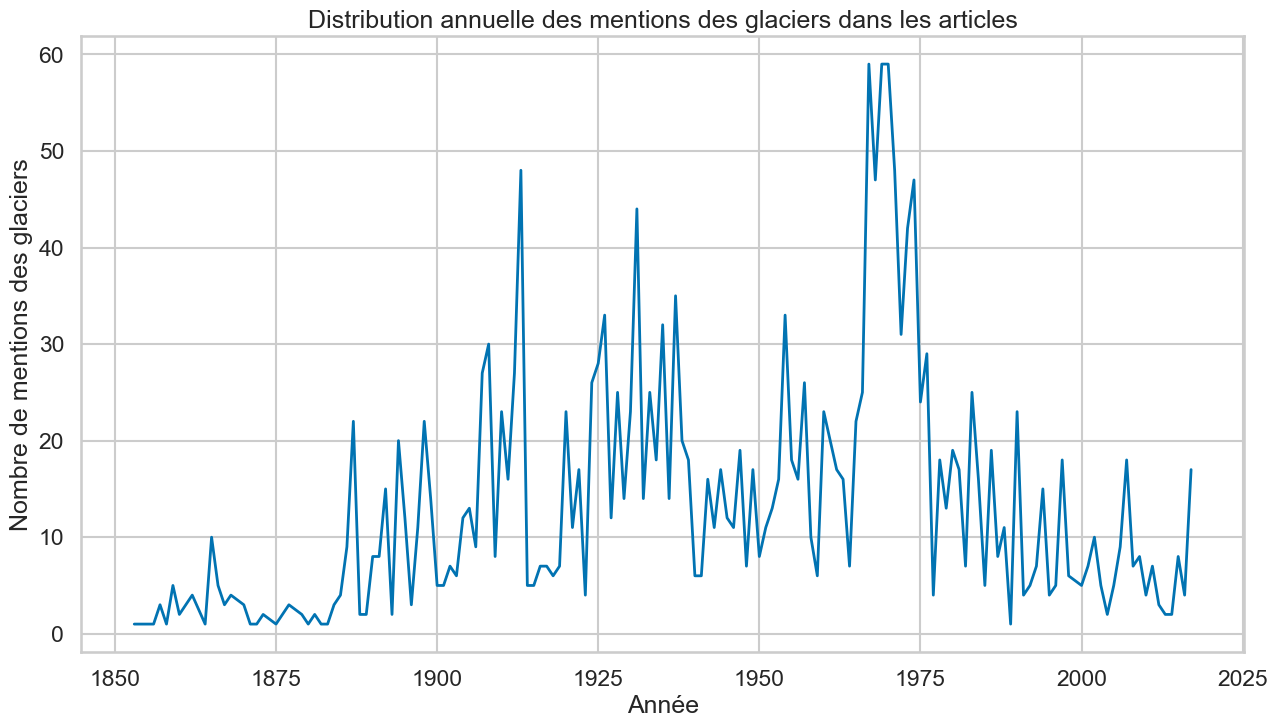

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.)

# Group the data by 'year' and count the number of entries
data_sorted = data.groupby('year').size()

sns.set_palette("colorblind")

# Create the line plot with sorted data
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=data_sorted, linewidth=2)
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de mentions des glaciers')
ax.set_title('Distribution annuelle des mentions des glaciers dans les articles')

plt.show()

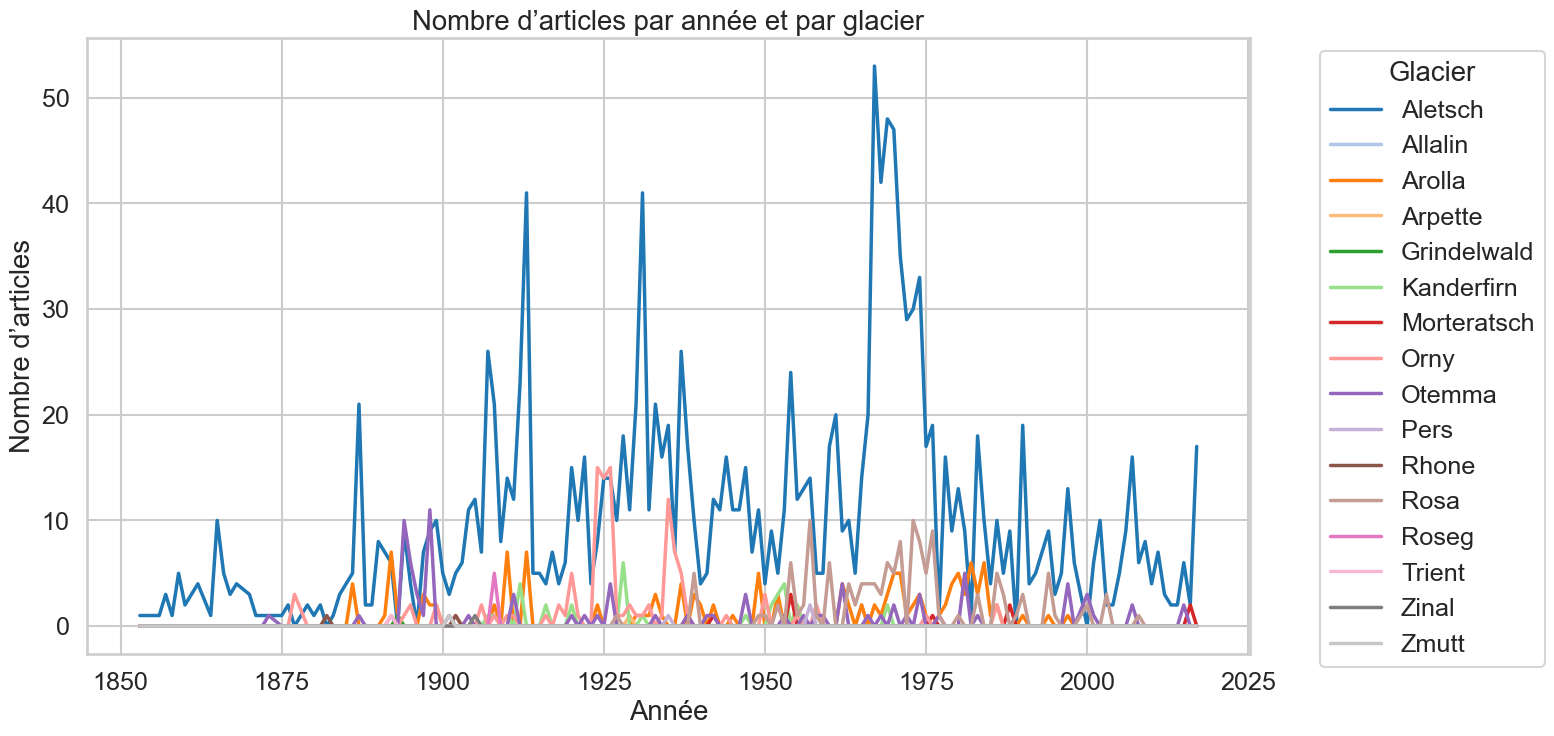

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.1)

##no_glaciers = data['glacier'].unique()
no_glaciers = len(data['glacier'].unique())

# Group the data by 'year' and 'glacier' and count the number of articles
grouped_data = data.groupby(['year', 'glacier']).size().reset_index(name='number_of_articles')

# Pivot the data to get counts of articles per year for each glacier
pivot_data = grouped_data.pivot(index='year', columns='glacier', values='number_of_articles').fillna(0)

# Manually create a palette with 16 distinct colors
palette = sns.color_palette("tab20", n_colors=no_glaciers)

# Create the line plot for each glacier
plt.figure(figsize=(15, 8))
for i, glacier in enumerate(pivot_data.columns):
    sns.lineplot(data=pivot_data[glacier], label=glacier, color=palette[i % no_glaciers], linewidth=2.5)

plt.xlabel('Année')
plt.ylabel('Nombre d’articles')
plt.title('Nombre d’articles par année et par glacier')
plt.legend(title='Glacier', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


  POLITICAL_UNIT   NAME  Event_ID  WGMS_ID EVENT_DATE  ET_SURGE  ET_CALVING  \
0             AQ  NO 38       344     4037   19909999       1.0         0.0   

   ET_FLOOD  ET_AVALANCHE  ET_TECTONIC  ET_OTHER  \
0       0.0           0.0          0.0       0.0   

                                   EVENT_DESCRIPTION  INVESTIGATOR  \
0  The Oktyabr'sky glacier surged for an estimate...           NaN   

   SPONSORING_AGENCY        REFERENCE    REMARKS  PUB_IN_FOG  DATE  
0                NaN  Kotlakov (2008)  1985-1990         NaN  1990  
  POLITICAL_UNIT            NAME  Event_ID  WGMS_ID EVENT_DATE  ET_SURGE  \
1             AR  ALTO DEL PLOMO       133      922   19841114       1.0   

   ET_CALVING  ET_FLOOD  ET_AVALANCHE  ET_TECTONIC  ET_OTHER  \
1         0.0       1.0           0.0          0.0       0.0   

                                   EVENT_DESCRIPTION  INVESTIGATOR  \
1  On 14 November 1984, Rio del Plomo was dammed ...           NaN   

   SPONSORING_AGENCY              

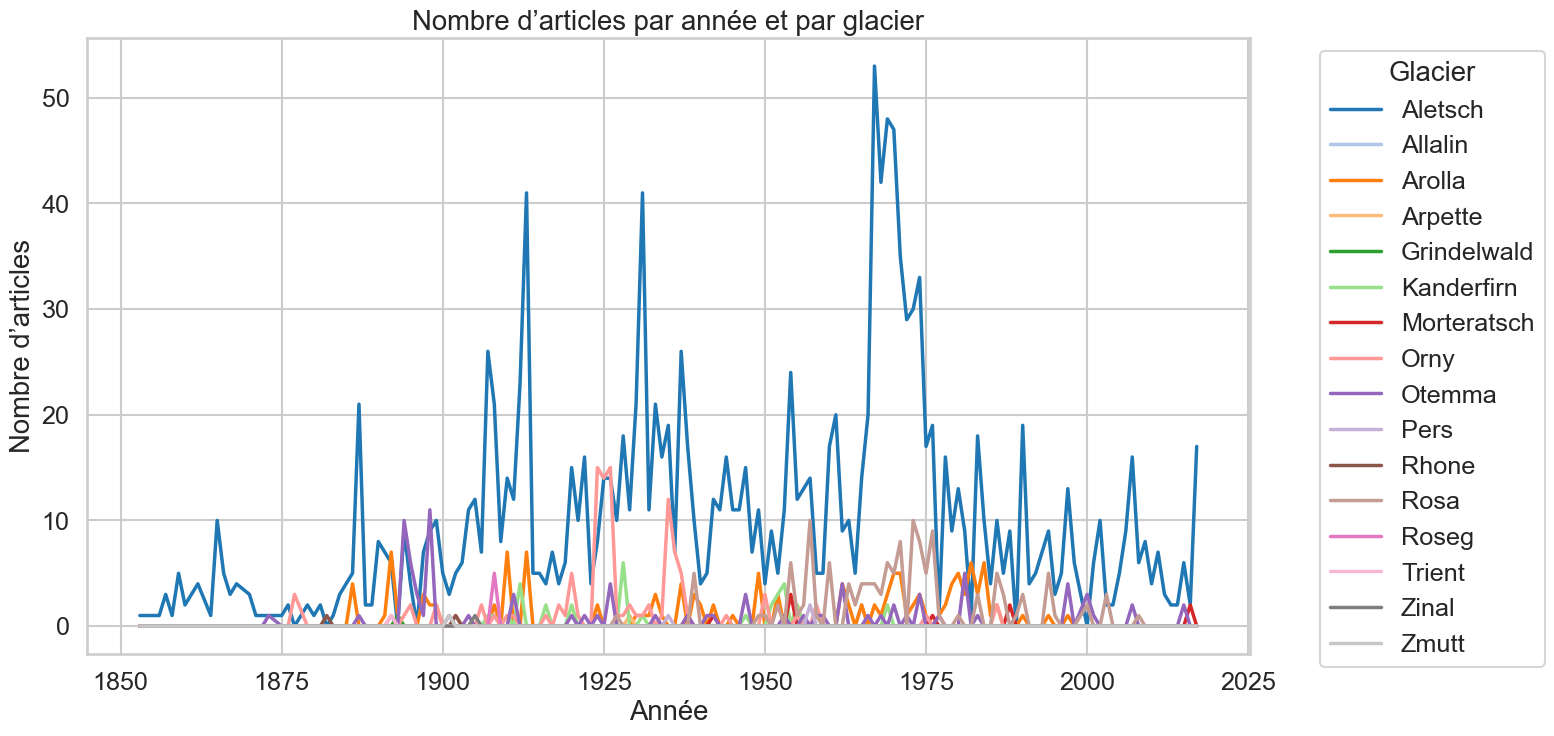

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.1)

#wgms_df2 = pd.DataFrame(wgms_dataframe2)

##no_glaciers = data['glacier'].unique()
no_glaciers = len(data['glacier'].unique())

# Group the data by 'year' and 'glacier' and count the number of articles
grouped_data = data.groupby(['year', 'glacier']).size().reset_index(name='number_of_articles')

# Pivot the data to get counts of articles per year for each glacier
pivot_data = grouped_data.pivot(index='year', columns='glacier', values='number_of_articles').fillna(0)

# Manually create a palette with 16 distinct colors
palette = sns.color_palette("tab20", n_colors=no_glaciers)

# Create the line plot for each glacier
plt.figure(figsize=(15, 8))
for i, glacier in enumerate(pivot_data.columns):
    sns.lineplot(data=pivot_data[glacier], label=glacier, color=palette[i % no_glaciers], linewidth=2.5)

# Ajoutez les points rouges
for glacier_name in wgms_df2['NAME'].unique():
    filtered_df2 = wgms_df2[(wgms_df2['NAME'] == glacier_name) & (wgms_df2['DATE'] != 'no date')]
    #plt.scatter(filtered_df2['DATE'].astype(int), [0] * len(filtered_df2), color='red', marker='o', label=f'{glacier_name} (Points rouges)')
    
    print(wgms_df2)

plt.xlabel('Année')
plt.ylabel('Nombre d’articles')
plt.title('Nombre d’articles par année et par glacier')
plt.legend(title='Glacier', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [119]:

wgms_df2

,POLITICAL_UNIT,NAME,Event_ID,WGMS_ID,EVENT_DATE,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER,EVENT_DESCRIPTION,INVESTIGATOR,SPONSORING_AGENCY,REFERENCE,REMARKS,PUB_IN_FOG,DATE
0,AQ,NO 38,344,4037,19909999,1.0,0.0,0.0,0.0,0.0,0.0,The Oktyabr'sky glacier surged for an estimate...,NaN,NaN,Kotlakov (2008),1985-1990,NaN,1990
1,AR,ALTO DEL PLOMO,133,922,19841114,1.0,0.0,1.0,0.0,0.0,0.0,"On 14 November 1984, Rio del Plomo was dammed ...",NaN,NaN,"Espizua, L. E., Bengochea, J. D. (1990): Surge...",NaN,NaN,1984
2,AR,CERRO MARMOLEJO EAST GLACIER,594,8171,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date
3,AR,COLINA (COLINO),593,8170,19379999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,1937
4,AR,EAST OF CERRO POLLERAS,592,8169,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,US,YANERT,2826,7489,20019999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",surge onset: 2000,NaN,2001
3043,US,YENTNA,2781,7453,19729999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,1972
3044,US,YENTNA,2782,7453,20009999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,2000
3045,US,YUKON A,2943,7588,99999999,1.0,0.0,0.0,0.0,0.0,0.0,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN,NaN,no date


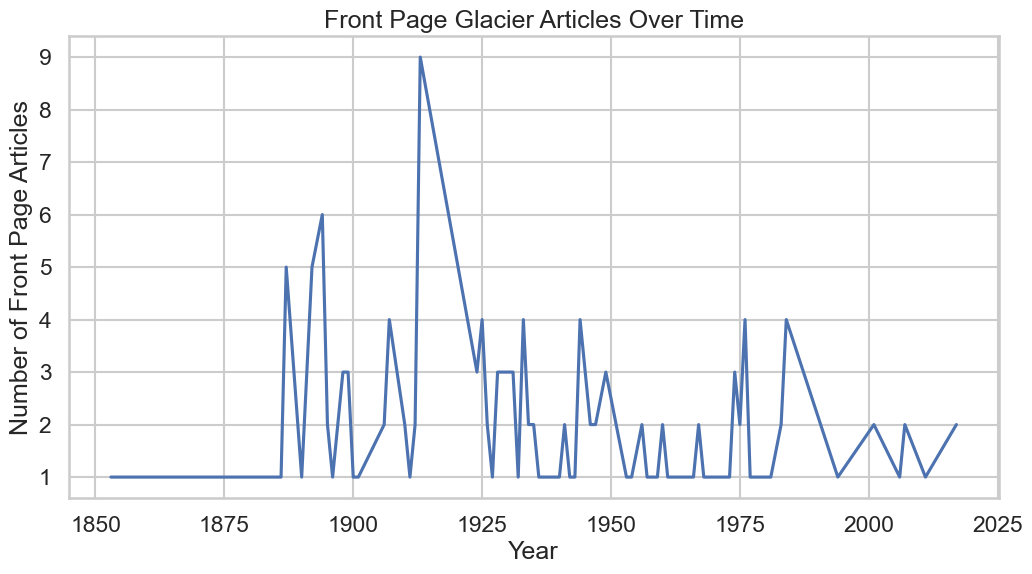

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1)

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front']]

# Group by year and count
front_page_counts = front_page_articles.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=front_page_counts)
plt.title('Front Page Glacier Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Front Page Articles')
plt.show()

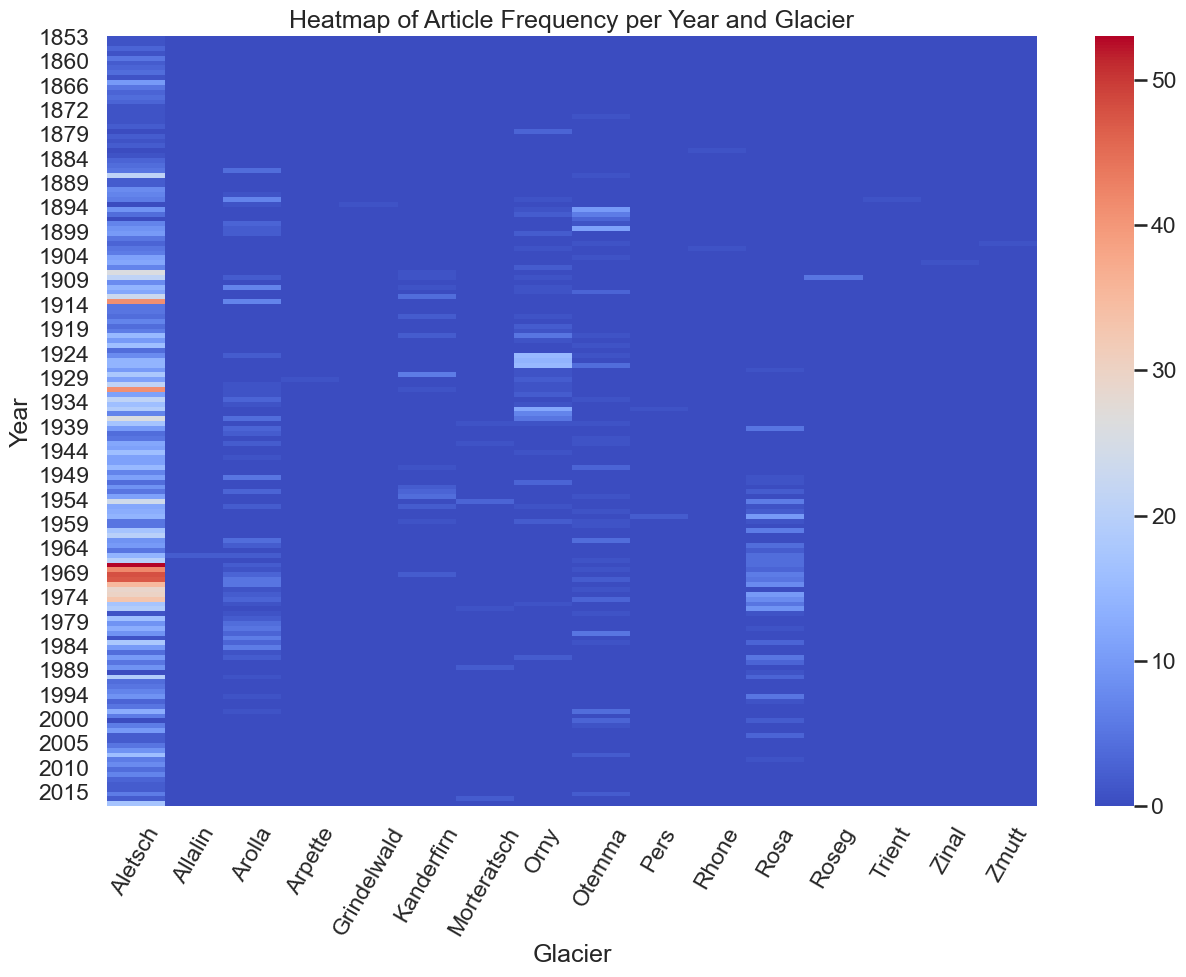

In [28]:
# Group by year and glacier, then count occurrences
article_counts = data.groupby(['year', 'glacier']).size().reset_index(name='count')

# Pivot for heatmap
pivot_data = article_counts.pivot(index='year', columns='glacier', values='count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Article Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


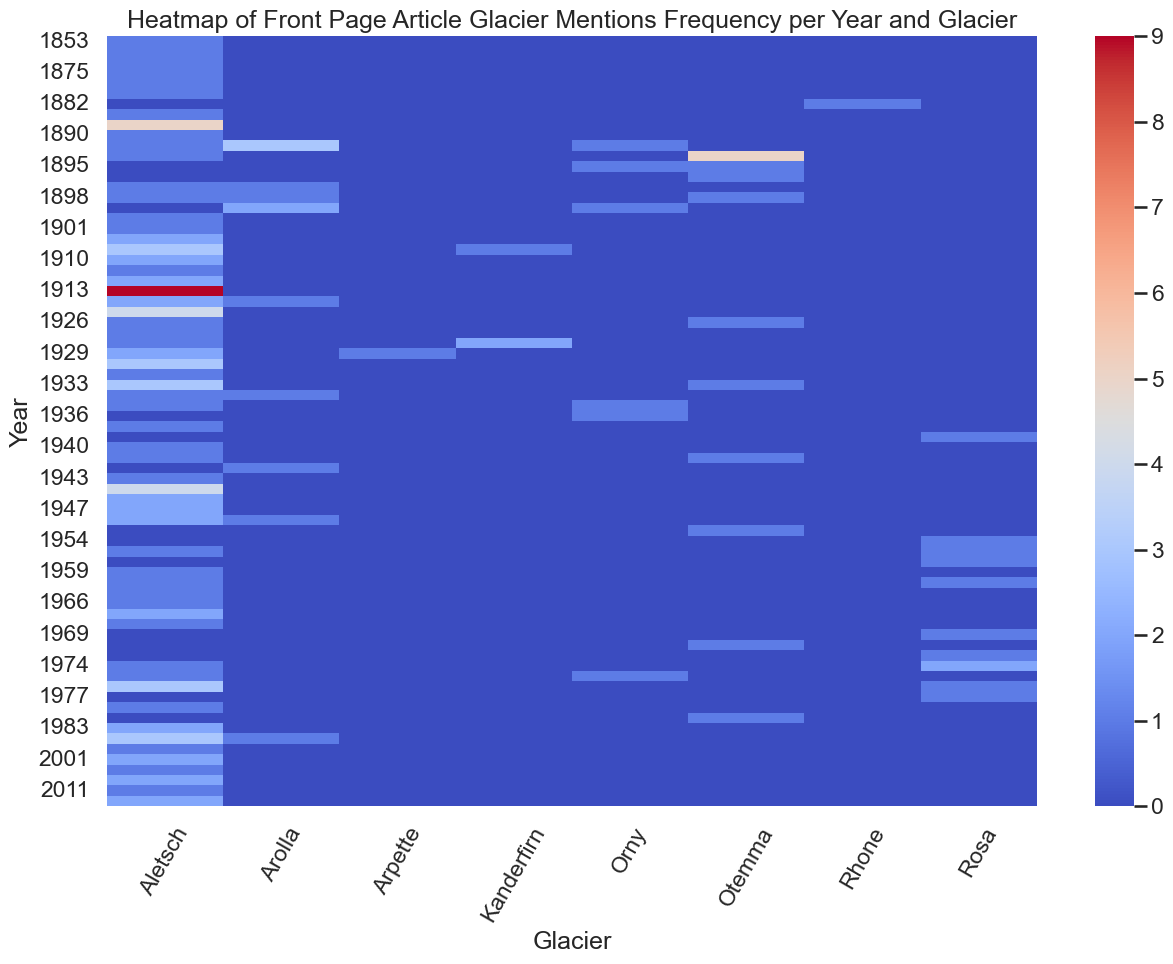

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front'] == True]

# Group by year and glacier, then count occurrences
front_page_article_counts = front_page_articles.groupby(['year', 'glacier']).size().reset_index(name='front_page_count')

# Pivot for heatmap
pivot_data = front_page_article_counts.pivot(index='year', columns='glacier', values='front_page_count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Front Page Article Glacier Mentions Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


### What happened in 1913 to Aletsch Glacier (it was on front page many times)?

In [30]:
# Filter for Aletsch Glacier and front-page articles
aletsch_articles = data[(data['glacier'] == 'Aletsch') & (data['is_on_front'] == True)]

# Find the year(s) with the maximum number of front-page mentions
max_mentions_year = aletsch_articles['year'].value_counts().idxmax()

# Filter articles from that year
max_mentions_articles = aletsch_articles[aletsch_articles['year'] == max_mentions_year]

# Display some articles - you can adjust the number of articles to display
print(max_mentions_articles[['title', 'date', 'content']].head())


                                      title                  date  \
786             £g$ manœuvres à la Jimgjran  1913-09-18T00:00:00Z   
789                           A la Jungfrau  1913-09-20T00:00:00Z   
1063  Une intéressante expérience militaire  1913-09-16T00:00:00Z   
1064             La 9 e brigade de montagne  1913-09-17T00:00:00Z   
1066                        Avant le départ  1913-09-18T00:00:00Z   

                                                content  
786   £ _g $ manœuvres à la _Jimgjran Nous avons dit...  
789   A la Jungfrau Le chemin de fer de la Jungfrau,...  
1063  Une intéressante expérience militaire Thoune, ...  
1064  La 9 brigade de montagne Thoune, le 15 septemb...  
1066  Avant le départ Thoune, le 16 septembre. (De n...  


In [31]:
for index, row in max_mentions_articles.iterrows():
    print(f"Title: {row['title']}")
    print(f"Date: {row['date']}")
    print(f"Content: {row['content'][:400]}\n")
    print("----------------------------------------------------\n")

Title: £g$ manœuvres à la Jimgjran
Date: 1913-09-18T00:00:00Z
Content: £ _g $ manœuvres à la _Jimgjran Nous avons dit qu'un détachement de 520 hommes-, formé d une compagnie de chacun dés bataillons d'infanterie de montagne 34,35,36 et d'une compagnie sanitaire de 70 hommes, 'est arrivé, mardi matin, de Thoune à Interlaken pair bateau' spécial. Il est parti à pied, par Lauterbrunnen et _IWengen, pour la Petite Scheidegg, et de là il devait gagner hier matin par chemi

----------------------------------------------------

Title: A la Jungfrau
Date: 1913-09-20T00:00:00Z
Content: A la Jungfrau Le chemin de fer de la Jungfrau, œuvre unique et prodigieuse, transportera bientôt les voyageurs éblouis, à 4167 mètres, devant un panorama inoubliable. Au moment où les ckels de notre armée viennent de conduire 500 hommes de troupes à travers le glacier d'Aletsch, au milieu des neiges éternelles du massif de la Jungfrau, il est particulièrement intéressant de rappeler avec quelques 

--------------

In [32]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import unicodedata


def remove_accents(input_str):
    # Normalize Unicode characters and then encode to ASCII while ignoring non-spacing marks
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])


# Extract the sentence that contain the name of the glacier
def extract_sentence(content, glacier_name):
    content = remove_accents(content)
    sentences = sent_tokenize(content)
    for sentence in sentences:
        if glacier_name.lower() in sentence.lower():
            return sentence
    return None

# Apply the function to each row in the DataFrame
data['sentence_with_glacier'] = data.progress_apply(lambda row: extract_sentence(row['content'], row['glacier']), axis=1)


  0%|          | 0/2156 [00:00<?, ?it/s]

In [33]:
data.head()

,uid,language,title,size,country,newspaper,issue,pages,nb_pages,year,is_on_front,date,persons_mentioned,locations_mentioned,content,filename,glacier,sentence_with_glacier
0,JDG-1882-09-01-a-i0001,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,1882,True,1882-09-01T00:00:00Z,SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...,Graham|Graham|Baker|Russell|Graham|Alexandrie|...,"SUSSE GEK'EVE, 1 "" Septembre 1882. BULLETIN PO...",rhone.csv,Rhone,— Dernierement le domestique du chalet du Rose...
1,JDG-1902-09-06-a-i0042,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,1902,False,1902-09-06T00:00:00Z,Fritz Meyer|Ernest Ruch|professeur Hans Wirchow,Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...,DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...,rhone.csv,Rhone,"Deux etrangers, un monsieur et une dame, origi..."
0,LLE-1893-11-18-a-i0007,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,1893,False,1893-11-18T00:00:00Z,NaN,CHICAGO|Chicago|France|France|Italie|Japon|Bel...,"LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...",grindelwald.csv,Grindelwald,"De la , il a a ses pieds la vallee de Lauterbr..."
0,IMP-1929-08-17-a-i0004,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,1929,True,1929-08-17T00:00:00Z,Val Perret|Val Perret|Henri BUHLER,Cologne|Savoie|Venise|Rialto|Martigny,AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...,arpette.csv,Arpette,"Auparavant, il fallut s'appuyer encore le dete..."
0,IMP-1935-07-22-a-i0090,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,1935,False,1935-07-22T00:00:00Z,M. Gottfried Steffen|M. Gottfried Steffen|M. F...,Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...,Çn Suisse La fête des musiques ouvrières FRIBO...,pers.csv,Pers,"— Trois touristes balois, Adolf Egli, 21 ans, ..."


In [34]:
# Remove the accents from the text
data['content'] = data['content'].apply(remove_accents)

In [35]:
data['glacier'].unique()

array(['Rhone', 'Grindelwald', 'Arpette', 'Pers', 'Zmutt', 'Orny',
       'Allalin', 'Aletsch', 'Otemma', 'Morteratsch', 'Kanderfirn',
       'Trient', 'Rosa', 'Zinal', 'Roseg', 'Arolla'], dtype=object)

In [36]:
glacier_locations = {
    "Rhone": "Canton du Valais",
    "Grindelwald": "Canton de Berne",
    'Arpette': "Canton du Valais", 
    'Pers': "Canton des Grisons", 
    'Zmutt': "Canton du Valais",
    'Orny': "Canton du Valais",
    'Allalin': "Canton du Valais",
    'Aletsch': "Canton du Valais",
    'Otemma': "Canton du Valais", 
    'Morteratsch': "Canton des Grisons", 
    'Kanderfirn': "Canton de Berne",
    'Trient': "Canton du Valais",
    'Rosa': "Canton du Valais", 
    'Zinal': "Canton du Valais",
    'Roseg': "Canton des Grisons",  
    'Arolla': "Canton du Valais"
}

data['glacier_location'] = data['glacier'].apply(lambda glacier: glacier_locations[glacier])

In [37]:
data.head()

,uid,language,title,size,country,newspaper,issue,pages,nb_pages,year,is_on_front,date,persons_mentioned,locations_mentioned,content,filename,glacier,sentence_with_glacier,glacier_location
0,JDG-1882-09-01-a-i0001,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,1882,True,1882-09-01T00:00:00Z,SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...,Graham|Graham|Baker|Russell|Graham|Alexandrie|...,"SUSSE GEK'EVE, 1 "" Septembre 1882. BULLETIN PO...",rhone.csv,Rhone,— Dernierement le domestique du chalet du Rose...,Canton du Valais
1,JDG-1902-09-06-a-i0042,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,1902,False,1902-09-06T00:00:00Z,Fritz Meyer|Ernest Ruch|professeur Hans Wirchow,Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...,DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...,rhone.csv,Rhone,"Deux etrangers, un monsieur et une dame, origi...",Canton du Valais
0,LLE-1893-11-18-a-i0007,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,1893,False,1893-11-18T00:00:00Z,NaN,CHICAGO|Chicago|France|France|Italie|Japon|Bel...,"LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...",grindelwald.csv,Grindelwald,"De la , il a a ses pieds la vallee de Lauterbr...",Canton de Berne
0,IMP-1929-08-17-a-i0004,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,1929,True,1929-08-17T00:00:00Z,Val Perret|Val Perret|Henri BUHLER,Cologne|Savoie|Venise|Rialto|Martigny,AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...,arpette.csv,Arpette,"Auparavant, il fallut s'appuyer encore le dete...",Canton du Valais
0,IMP-1935-07-22-a-i0090,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,1935,False,1935-07-22T00:00:00Z,M. Gottfried Steffen|M. Gottfried Steffen|M. F...,Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...,Cn Suisse La fete des musiques ouvrieres FRIBO...,pers.csv,Pers,"— Trois touristes balois, Adolf Egli, 21 ans, ...",Canton des Grisons


# Preprocessing 

In [38]:
import spacy
import string
from nltk.corpus import stopwords

#spacy.cli.download("fr_core_news_lg")

nlp = spacy.load("fr_core_news_lg") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.fr.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

nltk_stopwords = stopwords.words('french')

spacy_stopwords[:10], punctuation[:10]

(['premier',
  'tiennes',
  'neanmoins',
  'faisant',
  'pu',
  'bas',
  'tel',
  'là',
  'sans',
  'dehors'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

In [39]:
data.head()

,uid,language,title,size,country,newspaper,issue,pages,nb_pages,year,is_on_front,date,persons_mentioned,locations_mentioned,content,filename,glacier,sentence_with_glacier,glacier_location
0,JDG-1882-09-01-a-i0001,fr,SUSSE,4435,CH,JDG,JDG-1882-09-01-a,"1,2",2,1882,True,1882-09-01T00:00:00Z,SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...,Graham|Graham|Baker|Russell|Graham|Alexandrie|...,"SUSSE GEK'EVE, 1 "" Septembre 1882. BULLETIN PO...",rhone.csv,Rhone,— Dernierement le domestique du chalet du Rose...,Canton du Valais
1,JDG-1902-09-06-a-i0042,fr,DERNIÈRESJ1ÉPÊCHES,593,CH,JDG,JDG-1902-09-06-a,3,1,1902,False,1902-09-06T00:00:00Z,Fritz Meyer|Ernest Ruch|professeur Hans Wirchow,Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...,DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...,rhone.csv,Rhone,"Deux etrangers, un monsieur et une dame, origi...",Canton du Valais
0,LLE-1893-11-18-a-i0007,fr,L'EXPOSITION DE CHICAGO,1379,CH,LLE,LLE-1893-11-18-a,3,1,1893,False,1893-11-18T00:00:00Z,NaN,CHICAGO|Chicago|France|France|Italie|Japon|Bel...,"LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...",grindelwald.csv,Grindelwald,"De la , il a a ses pieds la vallee de Lauterbr...",Canton de Berne
0,IMP-1929-08-17-a-i0004,fr,AU PIED OU CA\TO€.lMIE,1880,CH,IMP,IMP-1929-08-17-a,1,1,1929,True,1929-08-17T00:00:00Z,Val Perret|Val Perret|Henri BUHLER,Cologne|Savoie|Venise|Rialto|Martigny,AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...,arpette.csv,Arpette,"Auparavant, il fallut s'appuyer encore le dete...",Canton du Valais
0,IMP-1935-07-22-a-i0090,fr,Çn Suisse,605,CH,IMP,IMP-1935-07-22-a,8,1,1935,False,1935-07-22T00:00:00Z,M. Gottfried Steffen|M. Gottfried Steffen|M. F...,Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...,Cn Suisse La fete des musiques ouvrieres FRIBO...,pers.csv,Pers,"— Trois touristes balois, Adolf Egli, 21 ans, ...",Canton des Grisons


In [40]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# If you're not in a Jupyter environment
##tqdm.pandas()

def preprocess(phrase):
    # Convert to lowercase
    phrase = phrase.lower()

    # Remove tokens that are in the stopword list or are punctuation, and strip whitespace/newlines
    tokens = [token.text.replace('\n', '').strip() for token in nlp(phrase) 
              if token.text.lower() not in spacy_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Rejoin tokens and tokenize again (not always necessary, depends on the use case)
    phrase = ' '.join(tokens).lower()
    tokens = [token.replace('\n', '').strip() for token in word_tokenize(phrase) 
              if token.lower() not in nltk_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic again
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Return the preprocessed phrase
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text'] = data['content'].progress_apply(preprocess)

  0%|          | 0/2156 [00:00<?, ?it/s]

Lemmatisation

Le processus de « [**lemmatisation**](https://fr.wikipedia.org/wiki/Lemmatisation) » consiste à représenter les mots (ou [lemmes](https://fr.wikipedia.org/wiki/Lemme_(linguistique)) en linguistique) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On ne **conserve que le sens des mots** utilisés dans le corpus. 

In [41]:
doc = nlp("Malgré les circonstances, les citoyens étaient déterminés à défendre leurs convictions jusqu'au bout.")

for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', token.lemma_) # Comment obtenir le lemme d'un mot

Word: Malgré 	 Lemma: malgré
Word: les 	 Lemma: le
Word: circonstances 	 Lemma: circonstance
Word: , 	 Lemma: ,
Word: les 	 Lemma: le
Word: citoyens 	 Lemma: citoyen
Word: étaient 	 Lemma: être
Word: déterminés 	 Lemma: déterminer
Word: à 	 Lemma: à
Word: défendre 	 Lemma: défendre
Word: leurs 	 Lemma: leur
Word: convictions 	 Lemma: conviction
Word: jusqu' 	 Lemma: jusque
Word: au 	 Lemma: au
Word: bout 	 Lemma: bout
Word: . 	 Lemma: .


In [42]:
def preprocess_with_lemmatisation(phrase):
    
    phrase = phrase.lower() # minuscule
    
    
    tokens = []
    
    tokens = [token.lemma_.replace('\n', '').strip() for token in nlp(phrase)]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_with_lemmatisation'] = data['cleaned_text'].progress_apply(preprocess_with_lemmatisation)

  0%|          | 0/2156 [00:00<?, ?it/s]

In [43]:
data['cleaned_text']

0      susse eve septembre bulletin politique depeche...
1      dernieresj epeches suisse berne double suicide...
0      lexposition chicago chicago oclobre architectu...
0      pied lmie notes easra promeneur cliampex comme...
0      suisse fete musiques ouvrieres fribourg samedi...
                             ...                        
129    touristes peri epuisement froid sommet benito ...
130    varietes enfants journal relate lundi recente ...
131    touriste eiger retrouve vivont budget ordinair...
132    resume informations dimanche aout decouvert gl...
133    rsaxxe chute montagne professeur andre guex ma...
Name: cleaned_text, Length: 2156, dtype: object

# Entity detection (+ exploration of existing entities)

In [44]:
data.iloc[0]['content']

'SUSSE GEK\'EVE, 1 " Septembre 1882. BULLETIN POLITIQUE Les depeches officielles du quartier-general et les recits publies par les journaux anglais completent et rectifient sur certains points les premiers renseignements que nous avait transmis le telegraphe sur le combat du 28 aout. L\'attaque de cette position avancee par les Egyptiens a eu plus ou moins le tere d\'une surprise. Evidemment, on n\'at tendait rien de serieux pour ce jour-la. Sir Cfarnet Wolseley etait a Ismailia ; il avait laisse le general Graham aux avant-postes avec deux bataillons et demi et cinq canons. A cinq milles en arriere, a Mahsamah, se trouvait un corps nombreux de cavalerie, sous les ordres du major-general Drury-Lowe. Le lundi matin, des forces considerables se montrerent en avant de la position, dans plusieurs directions. Un detachement d\'infanterie montee, sous le commandement du major Hart, fut envoye pour reconnaitre ces troupes et fouiller les plis de terrain qui servaient a dissimuler leur marche.

In [45]:
# Example on how to extract entities
doc = nlp(data.iloc[0]['content'])
for ent in doc.ents:
        print(ent.text, '---', ent.label_)

SUSSE GEK'EVE --- MISC
quartier-general --- LOC
Egyptiens --- LOC
Cfarnet Wolseley --- PER
Ismailia --- MISC
general Graham --- PER
arriere --- LOC
Mahsamah --- PER
major-general Drury-Lowe --- PER
major Hart --- PER
Tell-el-Kebir --- LOC
Bedouins --- LOC
Gassasin --- LOC
general Graham --- PER
laissees --- PER
sir Baker Russell --- PER
Egyptiens --- LOC
couronnee --- ORG
Anglais --- LOC
ete --- ORG
ete --- ORG
ete --- ORG
Arabes --- MISC
marche des Anglais --- MISC
Sir Garnet Wolseley --- PER
general Graham --- PER
Gassasin --- PER
Tell-el-Kebir --- LOC
Alexandrie --- LOC
Ismailia --- LOC
Ramleh --- LOC
mee d'Arabi --- MISC
Mameluks --- LOC
Port-Said --- LOC
Arabi --- PER
Garnet Wolseley --- PER
Arabes --- MISC
Tell-el-Kebir --- LOC
Caire --- LOC
Arabi --- PER
Alexandrie --- LOC
Egypte --- LOC
Londres --- LOC
Constantinople --- LOC
arrot --- PER
Lord Dufferin --- PER
Said --- PER
deference --- PER
Londres --- LOC
Thessalie --- LOC
Berlin --- LOC
Karalik-Dervend --- LOC
Platamona --- L

In [46]:
len(data)

2156

In [47]:
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ['LOC', 'ORG']:
            # Keep only entities > 3 characters
            if len(ent.text) > 3:
                if ent.label_ in ['LOC']:
                    if ent.text[0].isupper():
                        # Keep the LOC entities that start with an upper character
                        entities.append((ent.text, ent.label_))
                else:
                    entities.append((ent.text, ent.label_))
    return entities
    
    
data['entities'] = data['content'].progress_apply(extract_entities)

  0%|          | 0/2156 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
data['entities']

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
# Postprocess locations already in the dataframe
data['locations_mentioned'] = data['locations_mentioned'].apply(lambda locations: 
                                                                locations.split('|') if '|' in str(locations) else [])

In [ ]:
# Postprocess persons already in the dataframe
data['persons_mentioned'] = data['persons_mentioned'].apply(lambda persons: 
                                                             persons.split('|') if '|' in str(persons) else [])

In [ ]:
# Transform all locations: if they are capitalized SUISSE --> Suisse

def postprocess_locations(list_locations):
    return [location[0].upper() + location[1:].lower() for location in list_locations]

data['locations_mentioned'] = data['locations_mentioned'].apply(postprocess_locations)

In [ ]:
data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

sns.set_palette("colorblind")

# Flatten the list of locations_mentioned into a single list
all_locations = [location for sublist in data['locations_mentioned'] for location in sublist]

# Count occurrences of each location
location_counts = Counter(all_locations)

# Convert to DataFrame for easy plotting
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Location', data=location_df.head(20)) # Adjust the number as needed
plt.title('Top 20 Locations Mentioned in Glacier Articles')
plt.xlabel('Number of Mentions')
plt.ylabel('Location')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Expand the 'locations_mentioned' column into a row for each location
locations_expanded = data.explode('locations_mentioned')

# Group by year and location, then count occurrences
location_counts_per_year = locations_expanded.groupby(['year', 'locations_mentioned']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='locations_mentioned', values='count').fillna(0)


# Identify the most common locations (you can adjust the number)
num_top_locations = 10  # For example, top 5 locations
top_locations = pivot_data.sum().sort_values(ascending=False).head(num_top_locations).index

# Plotting only the most common locations
plt.figure(figsize=(15, 10))
for location in top_locations:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title(f'Frequency of Top {num_top_locations} Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Count the number of articles per glacier location
glacier_location_counts = data['glacier_location'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=glacier_location_counts.index, y=glacier_location_counts.values)
plt.xlabel('Glacier Location')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Glacier Location')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Group by year and glacier location, then count occurrences
location_counts_per_year = data.groupby(['year', 'glacier_location']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='glacier_location', values='count').fillna(0)

# Plotting - you can adjust the number of glacier locations to display
plt.figure(figsize=(15, 10))
for location in pivot_data.columns:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title('Frequency of Glacier Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Glacier Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#!pip install keybert
#!pip install flair

In [ ]:
# kw_model = KeyBERT()
# keywords = kw_model.extract_keywords(doc)

In [ ]:
# from keybert import KeyBERT
# from flair.embeddings import TransformerDocumentEmbeddings

# roberta = TransformerDocumentEmbeddings('camembert-base')
# kw_model = KeyBERT(model=roberta)

In [ ]:
# data['cleaned_text'].iloc[0]

In [ ]:
# kw_model.extract_keywords(data['content'].iloc[0], keyphrase_ngram_range=(3, 3), use_mmr=True, diversity=0.7)

## Topic detection

In [ ]:
from bertopic import BERTopic

desired_number_of_topics = 20

topic_model = BERTopic(language="french", calculate_probabilities=True, verbose=True,
                       nr_topics=desired_number_of_topics)

topics, probs = topic_model.fit_transform(data["cleaned_text_with_lemmatisation"])

In [ ]:
topic_model.get_topic_info()

climate change: 7_glacier_glace_metre_recul 	[glacier, glace, metre, recul, rechauffement, ... 	[climat helvetie glacier fondre glacier aletsc...

In [ ]:
topic_names = topic_model.topic_labels_

In [ ]:
len(data)

In [ ]:
topic_names

Tentative of naming the topics:

* -1 --
* 0 Holiday Events
* 1 Sport Events
* 2 Holiday Events
* 3 Accidents
* 4 Hotels & Tourism
* 5 Hotels & Tourism
* 6 Hotels & Tourism
* 7 Climate Change
* 8 Accidents
* 9 ?
* 10 War Events
* 11 War Events
* 12 Sport Events
* 13 Glacier Measures
* 14 ?
* 15 ?
* 16 Hotels & Tourism
* 17 Constructions
* 18 Sport Events
* 19 ?

In [ ]:
# Add topic names to the DataFrame
data['topics'] = topics

data.head()

In [ ]:
CHECK_TOPIC = 0

for index, row in data[data['topics'] == CHECK_TOPIC].iterrows():
    print(f"Title: {row['title']}")
    print(f"Date: {row['date']}")
    print(f"Content: {row['content'][:400]}\n")
    print("----------------------------------------------------\n")

In [ ]:
# I don't know how correct they are: you need to check all of them

TOPIC_NAMES = {
    -1: "No topic",
    0: "No topic", # Check this: it does not look that the artciles are about the same subject
    1: "Publicity",#"Sport Events", #vacances dans une station/annonces,publicités
    2: "National Heritage",#"Holiday Events",#conseil fédéral/politique (la partie sur les glaciers est souvent petite et pas tjr relié au reste...)
    3: "Publicity",#"Accidents",#vacances dans une station/annonces,publicités
    4: "Accidents",#"Hotels & Tourism",#accidents
    5: "Accidents",#"Hotels & Tourism",#aviation : tourisme et accidents
    6: "Climate Change",#"Hotels & Tourism",#réchauffement climatique
    7: "Publicity",#"Climate Change",#hotel/annonces,publicités (même article qui se répète 9 fois :Content: 1055 m. au pied des Dents du Midi et Dent Blanche. Ligne du SImplon ; Chemin de fer electrique Aigle-Ollon-Monthey-Champery. Changement de train venant de Lausanne a Aigle, de Milan a St-Maurice. 27 juillet : Championnats internationaux de tennis de la Suisse ; 24 aout : Championnat du Valais. Hotels : Dents du Midi, Suisse, Champery, Beau-Sejour, Alpes, Valais. I n Dnnnnrflf Hotel-Chalet de la Fo)
    8: "Publicity",#"Accidents",#vacances dans une station/annonces,publicités
    9: "National Heritage",#"Hotels & Tourism",#protection de l'environnement ? (supprimer ce topic ?)
    10: "Sport Events",#évenement spéciaux
    11: "No topic",# supprimer (incohérent et trop peu d'articles)
    12: "War Events",#tirs, armée 
    13: "Publicity",#"Glacier Measures",#vacances dans une station/annonces,publicités
    14: "Publicity",#"National Heritage, patrimoine/UNESCO",#supprimer ? (peu articles) #hotel/annonces,publicités
    15: "Sport Events",#compétition ski
    16: "Hydraulics Contructions",#"Hotels & Tourism",#projets hydrauliques
    17: "Publicity",#"Constructions",#hotel/annonces,publicités
    18: "Glacial Study",#"Sport Events",# etude des glaciers ?
    #19: "National Heritage"
}

In [ ]:
data['topic_name'] = data['topics'].apply(lambda topic: TOPIC_NAMES[topic])

In [ ]:
data.head()

In [ ]:
data.year.sort_values(ascending=False)

In [ ]:
data.to_csv('final_data.csv')

In [ ]:
### Remove the noise
##data = data[data['topics'] != -1]

### removing temporaly "0" also
##data = data[data['topics'] != 0] 

In [ ]:
##data.to_csv('final_filtered_data.csv')

In [ ]:
len(data)

In [ ]:
data.head()

In [ ]:
topics_over_time = topic_model.topics_over_time(data["cleaned_text_with_lemmatisation"], data.year.to_list(), nr_bins=20)

In [ ]:
topics_over_time

In [ ]:
# Remove the noise
data = data[data['topics'] != -1]

# removing temporaly "0" also
data = data[data['topics'] != 0] 
data.to_csv('final_filtered_data.csv')

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[4])

In [ ]:
# keywords = ['réchauffement', 'réchauffe', 'climatique', 'glacier','glacière', 'météo','calotte glaciaire', 'érosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
# 'dégel','permafrost','géomorphologie','dérèglement','vague de chaleur','gaz à effet de serre','masse glaciaire']

In [ ]:
# from nltk.tokenize import word_tokenize
# from functools import partial

# def get_frequency(phrase, keyword):
    
#     return phrase.count(keyword)

# def get_total(phrase):
#     total = 0
#     for keyword in keywords:
#         total += phrase.count(keyword)
#     return total

# for keyword in keywords: 
#     data[keyword] = data['cleaned_text'].progress_apply(partial(get_frequency, keyword))

# data['total'] = data['cleaned_text'].progress_apply(get_total)

In [ ]:
# Topic Distribution
topic_distribution = data['topic_name'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_distribution.index, y=topic_distribution.values)
plt.xticks(rotation=45)
plt.title('Distribution of Topics in Articles')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
# Topic Trends Over Time
topic_trends = data[data.topic_name != "No topic"].groupby(['year', 'topic_name']).size().reset_index(name='count')
pivot_topics = topic_trends.pivot(index='year', columns='topic_name', values='count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_topics)
plt.title('Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Topic Distribution by Glacier Location
topic_glacier_location = data.groupby(['glacier_location', 'topic_name']).size().reset_index(name='count')
pivot_glacier_topic = topic_glacier_location.pivot(index='glacier_location', columns='topic_name', values='count').fillna(0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_glacier_topic, annot=False, cmap='coolwarm')
plt.title('Topic Distribution by Glacier Location')
plt.xlabel('Topic')
plt.ylabel('Glacier Location')
plt.show()


In [ ]:
# Topic Distribution by Glacier 
topic_glacier_location = data.groupby(['glacier', 'topic_name']).size().reset_index(name='count')
pivot_glacier_topic = topic_glacier_location.pivot(index='glacier', columns='topic_name', values='count').fillna(0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_glacier_topic, annot=False, cmap='coolwarm')
plt.title('Topic Distribution by Glacier')
plt.xlabel('Topic')
plt.ylabel('Glacier')
plt.show()


Let's also look at the climate change topic (7):

In [ ]:
# Filter for "Climate Change" articles
climate_change_articles = data[data['topic_name'] == 'Climate Change']

# Group by year and count
climate_change_trend = climate_change_articles.groupby('year').size()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=climate_change_trend)
plt.title('Number of "Climate Change" Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for "Climate Change" articles
climate_change_articles = data[data['topic_name'] == 'Climate Change']

# Aggregate the text of these articles
text = ' '.join(article for article in climate_change_articles['cleaned_text_with_lemmatisation'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for "Climate Change" Articles')
plt.show()


In [ ]:
# Filter for "Climate Change" articles
climate_change_articles = data[data['topic_name'] == 'Climate Change']

# Group by location and count the number of articles
location_counts = climate_change_articles['glacier_location'].value_counts()

location_counts

# Sentiment Analysis

In [ ]:
data.columns

In [ ]:
from transformers import pipeline

sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

sentiment_classifier("I love this movie and I would watch it again and again!")

In [ ]:
def get_sentiment(sentence):
    # Cutting the sentence so it can be accepted by the model
    sentence = ' '.join(sentence.split(' ')[:100])
    # Perform sentiment analysis
    sentiment_result = sentiment_classifier(sentence)

    # Extract the label with the highest score
    sentiment_label = max(sentiment_result[0], key=lambda x: x['score'])['label']
    return sentiment_label

# Apply the sentiment analysis to the 'sentence_with_glacier' column
data['sentiment'] = data['sentence_with_glacier'].progress_apply(get_sentiment)

# Display the first few rows of the DataFrame to verify
print(data[['sentence_with_glacier', 'sentiment']].head())


In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution in Glacier Sentences')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
CHECK_SENTIMENT = 'negative'

for index, row in data[data['sentiment'] == CHECK_SENTIMENT].iterrows():
    print(f"Title: {row['title']}")
    print(f"Date: {row['date']}")
    print(f"Content: {row['sentence_with_glacier'][:400]}\n")
    print("----------------------------------------------------\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sentiment, then count occurrences
year_sentiment = data.groupby(['year', 'sentiment']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_year = year_sentiment.pivot(index='year', columns='sentiment', values='count').fillna(0)

# Plotting
pivot_year.plot(kind='bar', stacked=True, figsize=(45, 18))
plt.title('Sentiment Distribution Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Create a new column for the decade
data['decade'] = (data['year'] // 10) * 10

# Group by decade and sentiment, then count occurrences
decade_sentiment = data.groupby(['decade', 'sentiment']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_decade = decade_sentiment.pivot(index='decade', columns='sentiment', values='count').fillna(0)

# Plotting
pivot_decade.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sentiment Distribution Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Group by glacier and sentiment, then count occurrences
glacier_sentiment = data.groupby(['glacier', 'sentiment']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_glacier = glacier_sentiment.pivot(index='glacier', columns='sentiment', values='count').fillna(0)

# Plotting
pivot_glacier.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sentiment Distribution Per Glacier')
plt.xlabel('Glacier')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


In [ ]:
climate_change_articles

In [ ]:
climate_change_articles = data[data['topic_name'] == 'Climate Change']

Topic: climate change

In [ ]:
# Group by year and sentiment, then count occurrences
climate_change_sentiment = climate_change_articles.groupby(['year', 'sentiment']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_climate_change_sentiment = climate_change_sentiment.pivot(index='year', columns='sentiment', values='count').fillna(0)

# Plotting
pivot_climate_change_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment in "Climate Change" Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.show()


# Word frequencies

In [ ]:
# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer

# nltk.download("vader_lexicon")

# sid = SentimentIntensityAnalyzer()

# pos = neg = neu = cumul_pos = cumul_neg = cumul_neu = 0

# for text in new_data['content']:
#     for sent in sent_tokenize(text):
#         sentiment_scores = sid.polarity_scores(sent)  
#         compound_score = sentiment_scores["compound"]

#         for keyword in keywords:
#             if keyword in sent:
#                 print(keyword, '----------', sent)

#                 if compound_score >= 0.05:
#                     sentiment = "Positive"
#                     pos += 1
#                 elif compound_score <= -0.05:
#                     sentiment = "Negative"
#                     neg += 1
#                 else:
#                     sentiment = "Neutral"
#                     neu += 1
                
#                 print(f"Sentiment: {sentiment}")
#                 print(keyword)
#                 print('Positive', pos)
#                 print('Negative',neg)
#                 print('Neutral',neu)
#         cumul_pos+=pos
#         cumul_neg+=neg
#         cumul_neu+=neu

In [ ]:
# total = cumul_pos+cumul_neg+cumul_neu
# print('Positive:', cumul_pos, 'In percentage:',cumul_pos/total*100)
# print('Negative:',cumul_neg, 'In percentage:',cumul_neg/total*100)
# print('Neutral:',cumul_neu, 'In percentage:',cumul_neu/total*100)

In [ ]:
# data.total.describe()

In [ ]:
# data['cleaned_text'].isnull().sum()

In [ ]:
# data.dropna(subset=['cleaned_text'], inplace=True)

In [ ]:
# import numpy as np

# list_a = [1, 1, 1, 1, 1]
# list_b = [2, 2, 2, 2, 2]

# np.hstack([list_a, list_b]) # Exemple de fonctionnement de cette méthode avec des listes

In [ ]:
import nltk
import numpy as np
freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data['cleaned_text_with_lemmatisation']]))

In [ ]:
for word in ['climat', 'rechauffement', 'rechauffe', 'climatique', 'glacier', 'glaciers','glaciere', 'meteo',
'fonte','calotte glaciaire', 'erosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
'degel','permafrost','geomorphologie','dereglement','vague de chaleur','gaz a effet de serre','masse glaciaire']:
    print(word, ':', freq[word])

In [ ]:
for word in ['a neuve', 'aletsch', 'allalin', 'arolla', 'arpette', 'berons', 'cervin', 'corbassière', 'darrey',
'dolent', 'evole', 'fee', 'ferpècle', 'fiesch', 'findelen', 'finsteraar', 'forno', 'gauli', 'giesen',
'gorner', 'grands', 'giétro', 'inférieur grindelwald', 'supérieur grindelwald', 'grindelwald', 'kanderfirn', 'lang',
'lauteraar', 'martinets', 'moiry', 'moming', 'mont-miné', 'morteratsch', 'oberaar', 'orny', 'otemma',
'palü', 'pers', 'petoudes', 'plaine morte', 'planereuses', 'plines', 'ravines rousses', 'rhône', 'ried',
'plateau rosa', 'roseg', 'saleinaz', 'silvretta', 'théodule', 'tourtemagne', 'treutsebo', 'trient',
'trift (gadmen)', 'tsanfleuron', 'tschierva', 'unteraar', 'zinal', 'zmutt']:
        print(word, ':', freq[word])

In [ ]:
print(freq.most_common(25))

In [ ]:
plt.figure(figsize=(18, 6))

_ = freq.plot(50, cumulative=False)

In [ ]:
#import nltk
#import numpy as np

yearly_freq_dict = {}

for year in sorted(data['year'].unique()):
    data_year = data[data['year'] == year]['cleaned_text_with_lemmatisation']
    
    freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data_year]))
    
    yearly_freq_dict[year] = freq.most_common(5)

for year, freq_dist in yearly_freq_dict.items():
    print(f"Year: {year}, Frequency Distribution: {freq_dist}")